In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# l’indice de masse corporel (bmi) : ça permet de donner un rapport entre la taille et le poids. Idéalement, il faut être en 28.5 et 24.9
# le sexe (sex): le genre de la personne qui contracte l'assurance, homme ou femme
# l’âge (age): l'âge du principal bénéficiaire
# le nombre d’enfant à charge (children) : Nombre d'enfant couverts par l'assurance
# smoker : fumeur ou non-fumeur
# région (region) : le zone résidentielle dans les US, nord-est, sud-est, sud-ouest, nord-ouest
# charges : la prime d’assurance facturée (cible)

# Si l’IMC est :  entre 25,0 et 29,9 kg/m², il existe un surpoids ; 
# entre 30,0 et 34,9 kg/m², il s’agit d’obésité modérée ; entre 35,0 et 39,9 kg/m², 
# il s’agit d’une obésité sévère ; plus de 40 kg/m², on parle d’obésité massive.

df = pd.read_csv('dataset.csv')
df.head(25)


,age,bmi,children,region,charges,sex,smoker
0,19,27.900,0,southwest,16884.92400,1,1
1,18,33.770,1,southeast,1725.55230,0,0
2,28,33.000,3,southeast,4449.46200,0,0
3,33,22.705,0,northwest,21984.47061,0,0
4,32,28.880,0,northwest,3866.85520,0,0
5,31,25.740,0,southeast,3756.62160,1,0
6,46,33.440,1,southeast,8240.58960,1,0
7,37,27.740,3,northwest,7281.50560,1,0
8,37,29.830,2,northeast,6406.41070,0,0
9,60,25.840,0,northwest,28923.13692,1,0


In [162]:
df.tail(25)

,age,bmi,children,region,charges,sex,smoker
1312,19,34.700,2,southwest,36397.57600,1,1
1313,30,23.655,3,northwest,18765.87545,1,1
1314,18,28.310,1,northeast,11272.33139,0,0
1315,19,20.600,0,southwest,1731.67700,1,0
1316,18,53.130,0,southeast,1163.46270,0,0
1317,35,39.710,4,northeast,19496.71917,0,0
1318,39,26.315,2,northwest,7201.70085,1,0
1319,31,31.065,3,northwest,5425.02335,0,0
1320,62,26.695,0,northeast,28101.33305,0,1
1321,62,38.830,0,southeast,12981.34570,0,0


In [163]:
print(df.shape)

# 1338 lignes
# 7 colonnes dont la variable cible (charges)

(1337, 7)


# Analyse Univariate

In [164]:
df.dtypes

age           int64
bmi         float64
children      int64
region       object
charges     float64
sex           int64
smoker        int64
dtype: object

In [165]:
df.describe()


,age,bmi,children,charges,sex,smoker
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.495138,0.204936
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9386.161300,0.000000,0.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


<Axes: >

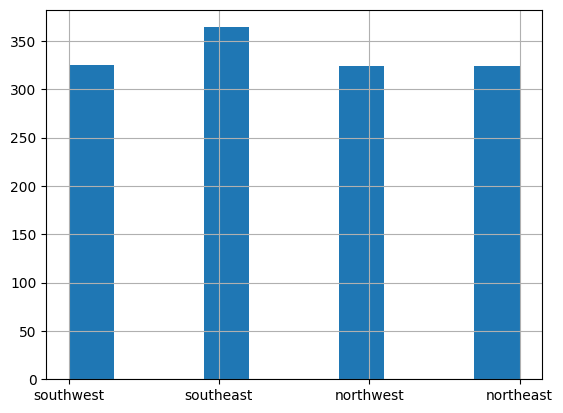

In [166]:
#focus variable region qui est categorielle
df['region'].hist()

In [167]:
region_describe = df['region'].describe()
count_region = df['region'].value_counts()

print(region_describe, count_region)



count          1337
unique            4
top       southeast
freq            364
Name: region, dtype: object region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


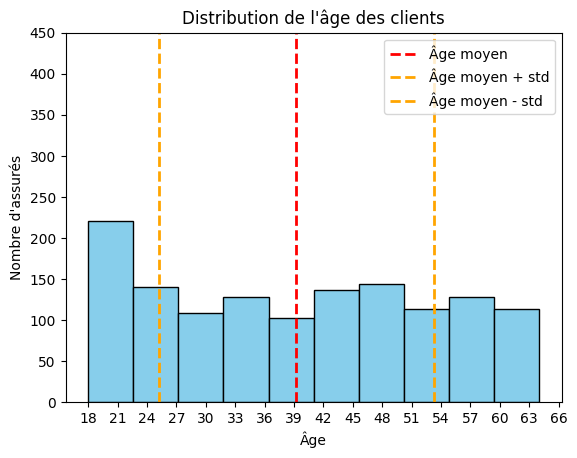

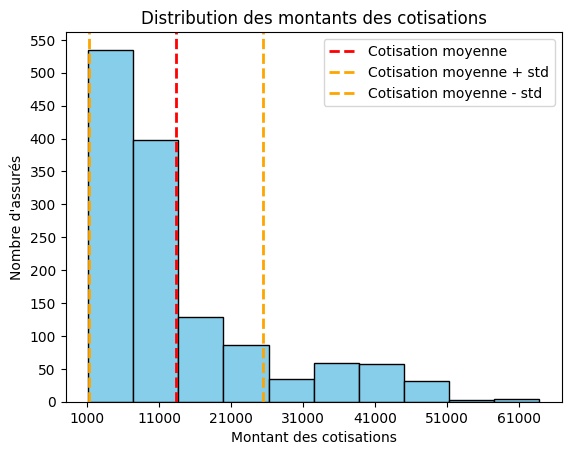

In [168]:
#focus sur l'age et sur les charges

# graph age moyen + std

plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution de l\'âge des clients')
plt.xlabel('Âge')
plt.ylabel("Nombre d'assurés")
plt.axvline(df['age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Âge moyen')  # Ligne verticale pour l'âge moyen
# Lignes verticales pour la moyenne ± la déviation standard
plt.axvline(df['age'].mean() + df['age'].std(), color='orange', linestyle='dashed', linewidth=2, label='Âge moyen + std')
plt.axvline(df['age'].mean() - df['age'].std(), color='orange', linestyle='dashed', linewidth=2, label='Âge moyen - std')
plt.legend()

# Ajuster l'échelle de l'axe Y pour avoir des valeurs entières
plt.yticks(range(0, 500, 50))  # Ajuster la plage en fonction de votre distribution

# Ajouter des étiquettes pour l'axe X
plt.xticks(range(18, 67, 3))  # Ajuster la plage en fonction de votre distribution

plt.show()



# graph montant charges + std

plt.hist(df['charges'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution des montants des cotisations')
plt.xlabel('Montant des cotisations')
plt.ylabel("Nombre d'assurés")
plt.axvline(df['charges'].mean(), color='red', linestyle='dashed', linewidth=2, label='Cotisation moyenne')  # Ligne verticale pour l'âge moyen
# Lignes verticales pour la moyenne ± la déviation standard
plt.axvline(df['charges'].mean() + df['charges'].std(), color='orange', linestyle='dashed', linewidth=2, label='Cotisation moyenne + std')
plt.axvline(df['charges'].mean() - df['charges'].std(), color='orange', linestyle='dashed', linewidth=2, label='Cotisation moyenne - std')
plt.legend()

# Ajuster l'échelle de l'axe Y pour avoir des valeurs entières
plt.yticks(range(0, 600, 50))  # Ajuster la plage en fonction de votre distribution

# Ajouter des étiquettes pour l'axe X
plt.xticks(range(1000, 64000, 10000))  # Ajuster la plage en fonction de votre distribution

plt.show()

stats age : 
count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
skew : 0.054780773126998195


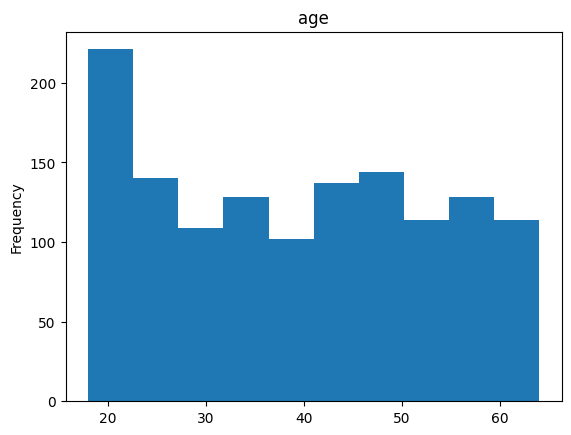

stats bmi : 
count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64
bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64
skew : 0.28391419385321137


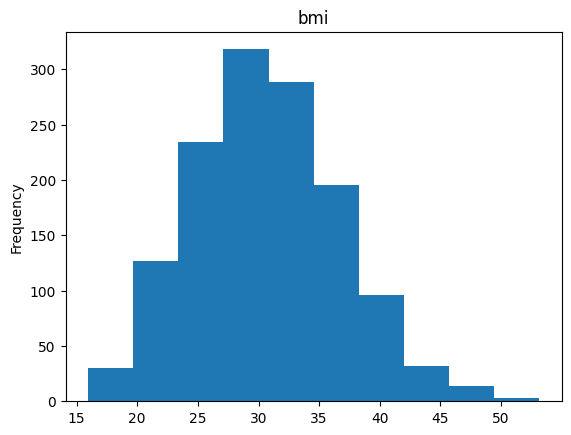

stats children : 
count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
skew : 0.9374206440474123


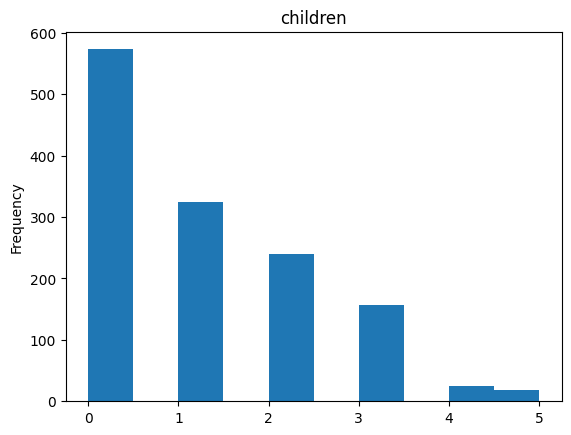

stats charges : 
count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64
charges
16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64
skew : 1.5153909108403483


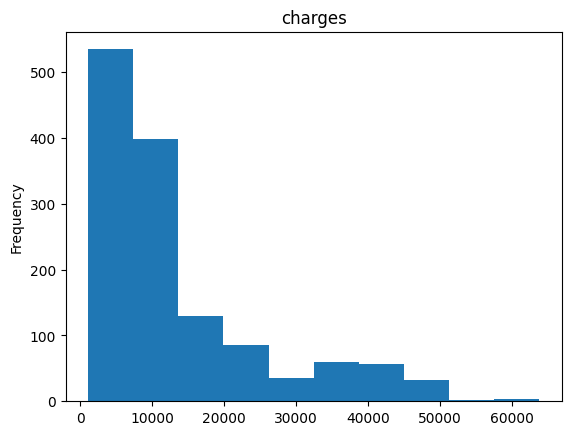

stats sex : 
count    1337.000000
mean        0.495138
std         0.500163
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64
sex
0    675
1    662
Name: count, dtype: int64
skew : 0.019469291079438414


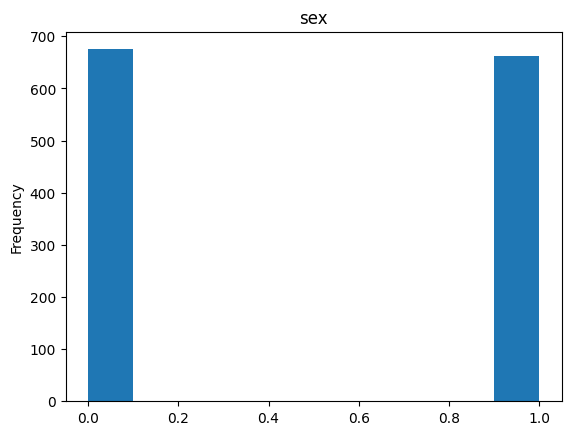

stats smoker : 
count    1337.000000
mean        0.204936
std         0.403806
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: smoker, dtype: float64
smoker
0    1063
1     274
Name: count, dtype: int64
skew : 1.4636011988101756


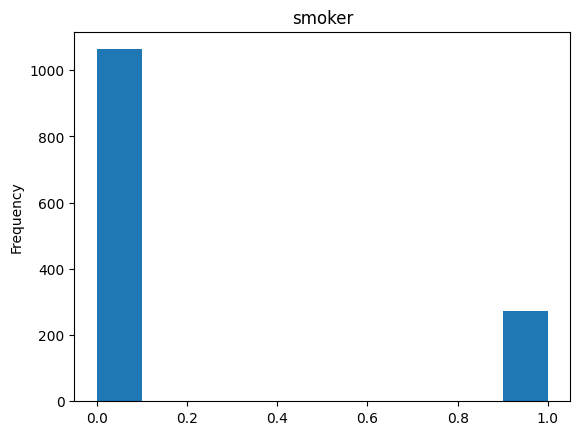

In [169]:
#focus sur toutes les variables une par une(sauf region) en faisant des hist pour voir la distribution et les stats

df_sans_region = df.drop('region', axis = 1)
 
for col in df_sans_region.columns:
  df_sans_region[col].plot(kind='hist')#kind='density' pour afficher une courbe plutot que des barres (on pourra voir les skewed), .plot() -> rien affiche baton par defaut
  plt.title(col)
  #ajouter des stats
  print(f'stats {col} : ')
  print(df_sans_region[col].describe())
  print(df_sans_region[col].value_counts())
  print('skew :', df_sans_region[col].skew())
  plt.show()#afficher le graphe

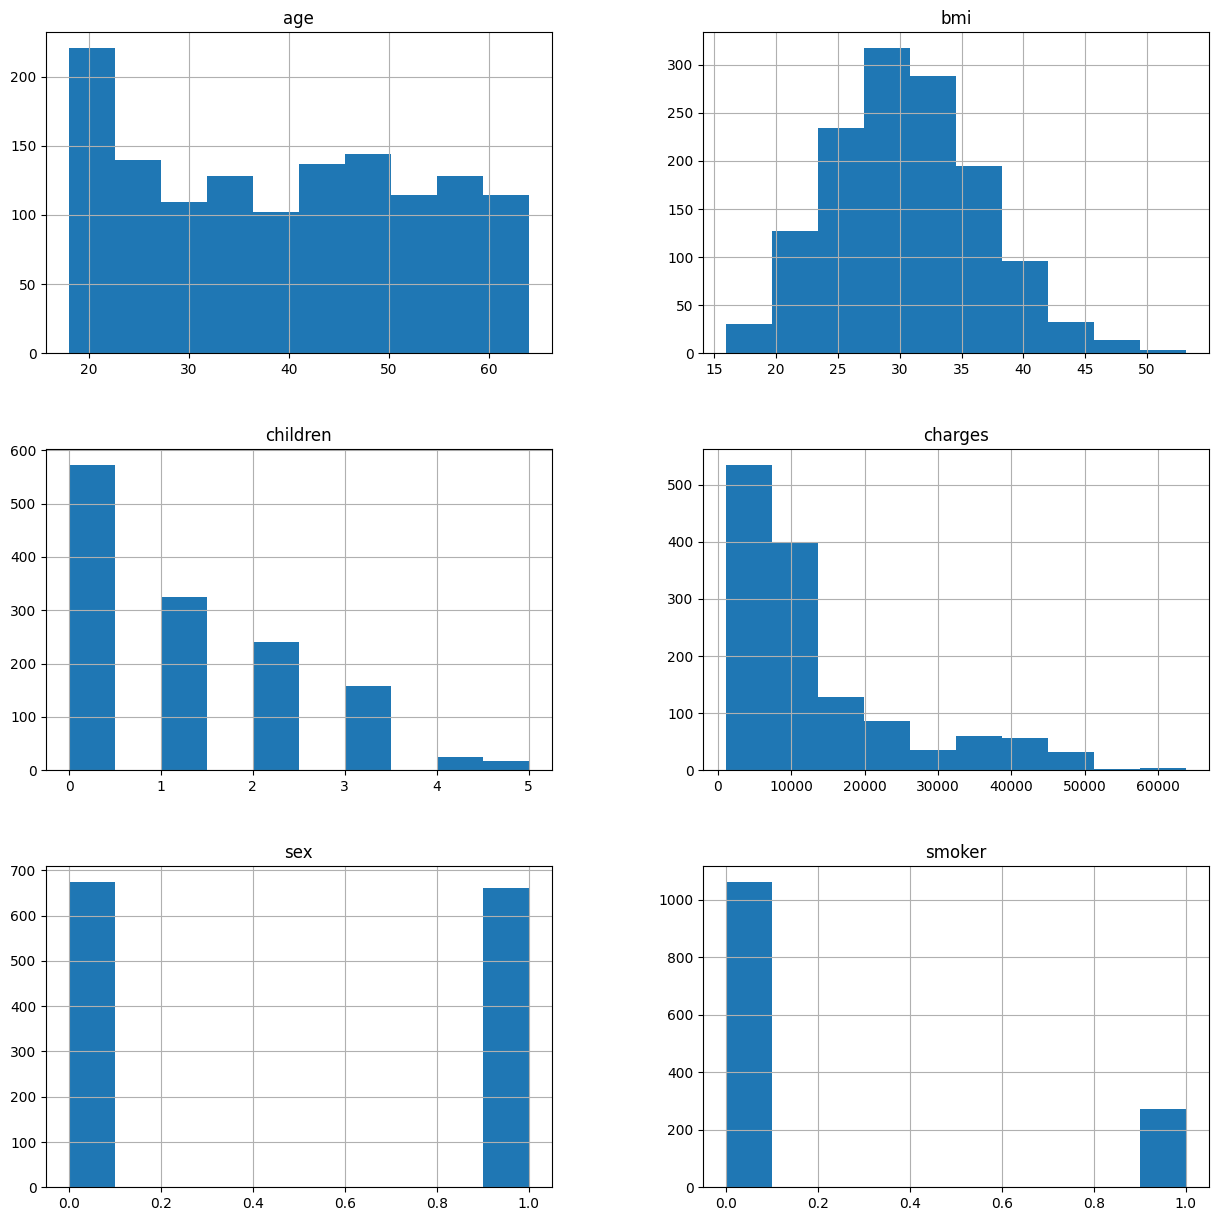

In [170]:
df.hist(figsize = (15,15));

age            Axes(0.125,0.653529;0.227941x0.226471)
bmi         Axes(0.398529,0.653529;0.227941x0.226471)
children    Axes(0.672059,0.653529;0.227941x0.226471)
charges        Axes(0.125,0.381765;0.227941x0.226471)
sex         Axes(0.398529,0.381765;0.227941x0.226471)
smoker      Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

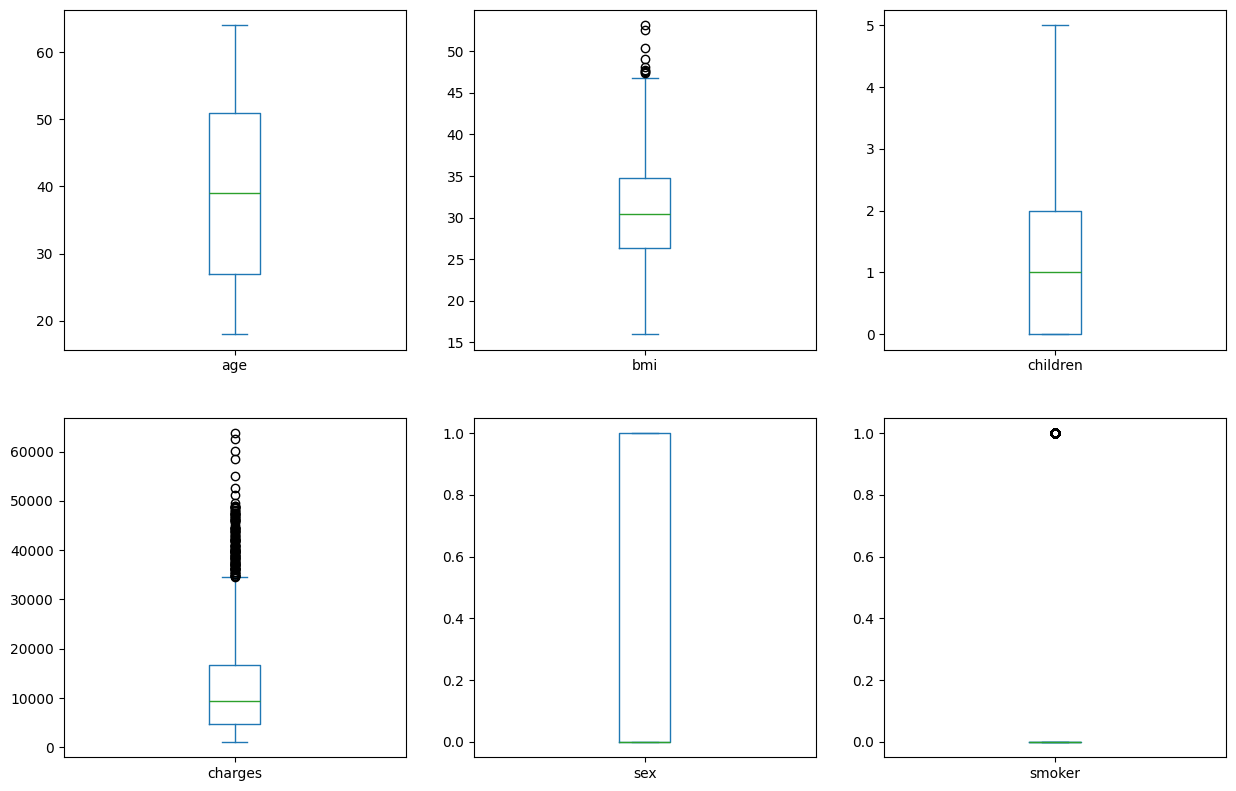

In [171]:
df.plot(kind='box',
          subplots=True,
          layout=(3,3),
          sharex= False, #share x -> le meme x donc le desactiver
          figsize = (15,15) #regler la taille des plots
          )

# Analyse Bivariate

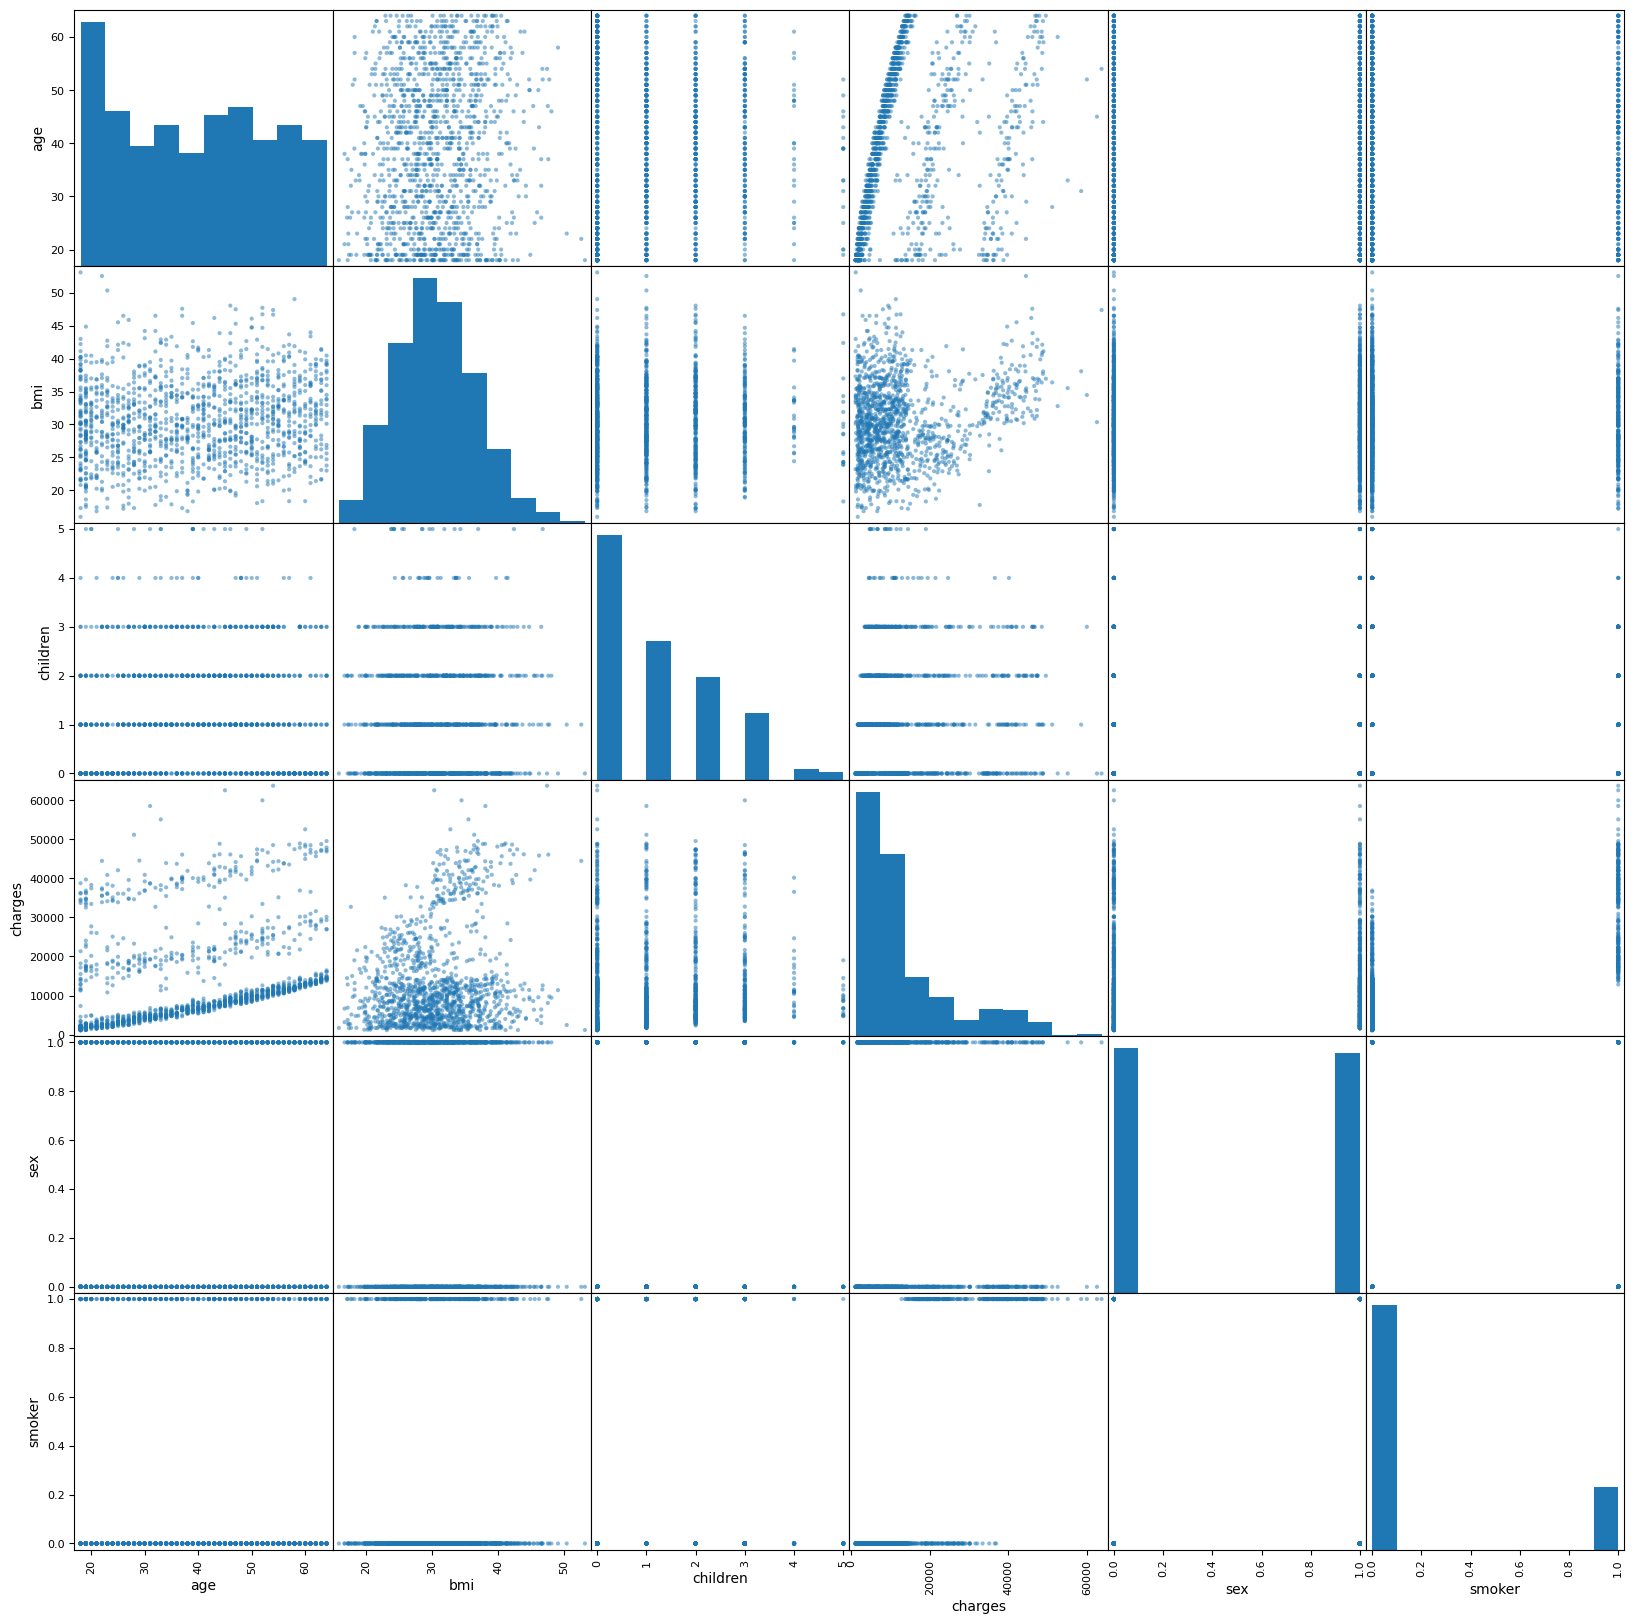

In [172]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20)); #possibilité d'ajouter alpha pour la transparence

Text(0.5, 1.0, 'smoker vs charges')

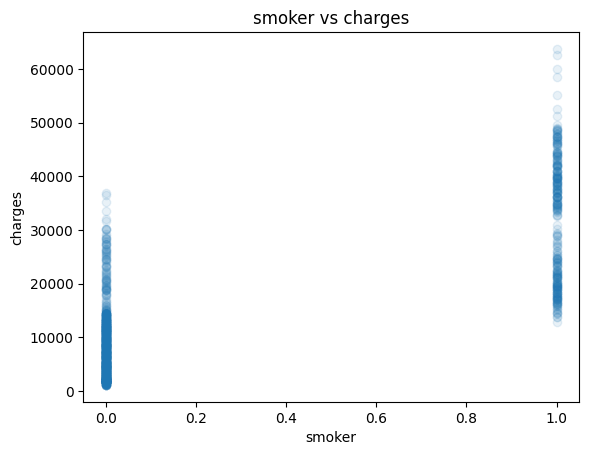

In [173]:
plt.scatter(x=df['smoker'], y=df['charges'], alpha=0.1)
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('smoker vs charges')

Text(0.5, 1.0, 'age vs charges')

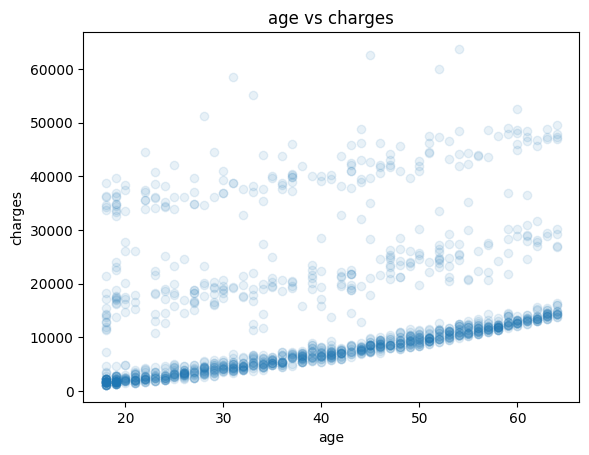

In [174]:
plt.scatter(x=df['age'], y=df['charges'], alpha=0.1)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('age vs charges')


Text(0.5, 1.0, 'bmi vs charges')

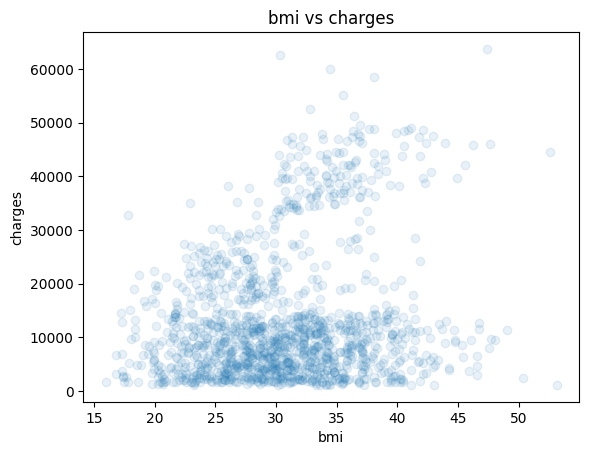

In [175]:
plt.scatter(x=df['bmi'], y=df['charges'], alpha=0.1)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('bmi vs charges')

In [176]:
df_encoded = pd.get_dummies(df, columns=['region'])
df_encoded.head()


,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,False,False,False,True
1,18,33.770,1,1725.55230,0,0,False,False,True,False
2,28,33.000,3,4449.46200,0,0,False,False,True,False
3,33,22.705,0,21984.47061,0,0,False,True,False,False
4,32,28.880,0,3866.85520,0,0,False,True,False,False


In [177]:
df_encoded.rename(columns={'region_northeast': 'NE', 'region_northwest': 'NW'}, inplace=True)
df_encoded.rename(columns={'region_southeast': 'SE', 'region_southwest': 'SW'}, inplace=True)


In [178]:
correlations = df_encoded.corr()
correlations
#corrélations évidentes :

# on note qu'il y a une corrélation entre la charge et smoker
# entre l'age et les charges

# peu évident
# entre bmi et les charges 
# entre bmi et l'age

,age,bmi,children,charges,sex,smoker,NE,NW,SE,SW
age,1.000000,0.109344,0.041536,0.298308,0.019814,-0.025587,0.001868,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,-0.046397,0.003746,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,-0.017848,0.007331,-0.023202,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,-0.058044,0.787234,0.005945,-0.038695,0.073578,-0.043637
sex,0.019814,-0.046397,-0.017848,-0.058044,1.000000,-0.076596,0.002008,0.012482,-0.017578,0.003767
smoker,-0.025587,0.003746,0.007331,0.787234,-0.076596,1.000000,0.002597,-0.036321,0.068282,-0.037168
NE,0.001868,-0.138178,-0.023202,0.005945,0.002008,0.002597,1.000000,-0.319842,-0.345909,-0.320493
NW,0.001495,-0.136138,0.026044,-0.038695,0.012482,-0.036321,-0.319842,1.000000,-0.345909,-0.320493
SE,-0.012311,0.270057,-0.023492,0.073578,-0.017578,0.068282,-0.345909,-0.345909,1.000000,-0.346614
SW,0.009415,-0.006211,0.021538,-0.043637,0.003767,-0.037168,-0.320493,-0.320493,-0.346614,1.000000


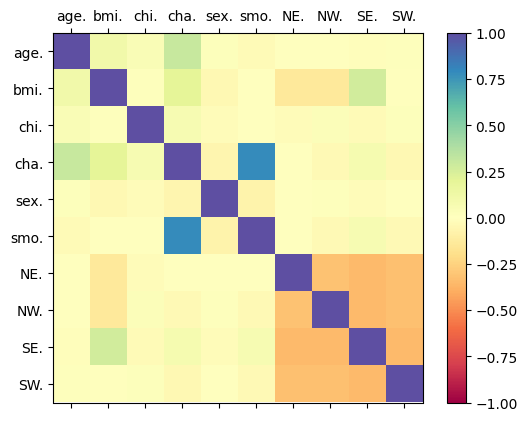

In [179]:
figure = plt.figure()#on créé le graphique vierge, poss. de mettre figsize en param

axe = figure.add_subplot(111)#subplot(111), vous créez essentiellement un seul graphique qui occupe toute la figure

corr = axe.matshow(correlations, vmin = -1, vmax= +1, cmap='Spectral')#tracer le graph, couleur etc

figure.colorbar(corr)#tracer la color bar a coté


#[legende]donner un nom aux ticks (à la place des 1 2 3 4 5 6 7 8 mettre le nom des colonnes)
# cols = data.columns
# axe.set_xticklabels(cols)
#les noms se s'empietent donc on va les raccourcir :
cols = [name[:3] + '.' for name in df_encoded.columns]
axe.set_xticks(range(0, len(cols)))
axe.set_xticklabels(cols)

axe.set_yticks(range(0, len(cols)))
axe.set_yticklabels(cols)
plt.show()